In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.style.use("ggplot")

In [2]:
# Eligible Voters estimated from 
# https://www.census.gov/data/tables/time-series/demo/voting-and-registration/congressional-voting-tables.html
# using Table 2A and assuming uniform distribution per year to convert eg. 18-29 -> 18-24.
# Note this is 2018 data, so eligible_voters is probably a bit higher and age distribution may have changed

eligible_voters = 7542878
p = np.array([0.121674799, 0.086910571, 0.146145985, 0.159949381, 0.260629166, 0.224690098]) # these are the widths
eligible_voters_by_age = eligible_voters * p

# Primary voting data from
# https://www.nytimes.com/interactive/2020/03/10/us/elections/exit-polls-michigan-primary.html

voters = 1585410
voters_by_age = np.array([8, 8, 15, 17, 33, 19]) / 100 * voters
y1 = np.array([79,75,57,44,24,21]) / 100
y2 = np.array([18,19,38,50,68,73]) / 100
y3 = 1 - y1 - y2
voters_y1 = y1 * voters_by_age / eligible_voters_by_age
voters_y2 = y2 * voters_by_age / eligible_voters_by_age
voters_y3 = y3 * voters_by_age / eligible_voters_by_age

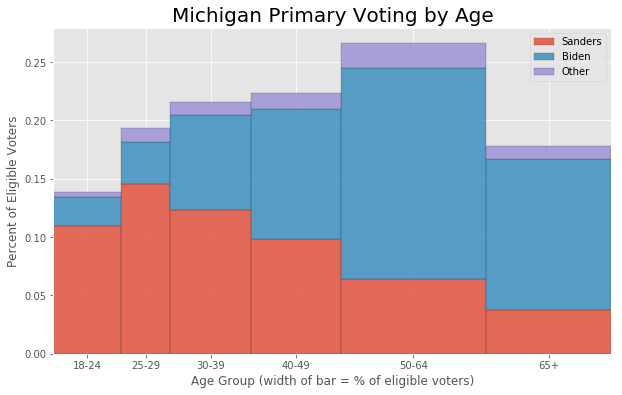

In [4]:
objects = ('18-24', '25-29', '30-39', '40-49', '50-64', '65+')
widths = p
y1 = voters_y1
y2 = voters_y2
y3 = voters_y3

x_pos = np.zeros(widths.shape)
x_pos[0] = widths[0]/2
for i in range(1, len(x_pos)):
    x_pos[i] = x_pos[i-1] + (widths[i-1] + widths[i])/2

plt.figure(figsize=(10, 6))
style_kwargs = dict(align='center', alpha=0.8, linewidth=0.2, edgecolor='black', )
plt.bar(x_pos, y1, width=widths, **style_kwargs)
plt.bar(x_pos, y2, width=widths, bottom=y1, **style_kwargs)
plt.bar(x_pos, y3, width=widths, bottom=y1+y2, **style_kwargs)
plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.xticks(x_pos, objects)
plt.xlabel('Age Group (width of bar = % of eligible voters)')
plt.ylabel('Percent of Eligible Voters')
plt.title('Michigan Primary Voting by Age', fontsize=20)
plt.legend(["Sanders", "Biden", "Other"])